In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from scipy.integrate import solve_ivp


In [2]:
# Intento de Integrador
#def integrador(t0, tf, h):
    
#    N = int((tf - t0)/ h) + 1
    
#    t = np.linspace(t0,tf,N)
    
#    r = np.zeros([N])
#    vr = np.zeros([N])
#    theta = np.zeros([N])
#    vtheta = np.zeros([N])
    
#    r[0] = r0
#    vr[0] = vr0
#    theta[0] = theta0 
#    vtheta[0] = vtheta0

#    for i in range(1,N):
        
#        r[i+1] = r[i] + h*vr[i] + (1/6)*(4*aar()*(r[i]) - aar()*(r[i-1]))*h**2
#        vr[i+1] = vr[i] + (1/2)*(3*aar()*r[i]-aar()*(r[i-1]))*h
        
#        theta[i+1] = theta[i] + h*v[i] + (1/6)*(4*aatheta()*(theta[i]) - aatheta()*(theta[i-1]))*h**2
#        vtheta[i+1] = vtheta[i] + (1/2)*(3*aatheta()*theta[i]-aatheta()*(theta[i-1]))*h
        
#    return t, r, v

#sol = integrador(0, 30, 0.015)

In [3]:
k = 5
l = 3
m = 2
g = 9.8
r0 = 15
theta0 = np.pi/8
vr0 = 0
vtheta0 = 0

def System(t, Inicial):
    
    r, theta, vr,vtheta = Inicial
    
    ar = (k/m)*(l-r)+g*np.cos(theta) + r*vtheta**2
    
    atheta = -(g/r)*np.sin(theta) - 2/r *vr*vtheta 

    
    return np.array([vr,vtheta,ar,atheta])

In [4]:
# Definir condiciones iniciales

r0 = np.array([r0, theta0, vr0, vtheta0])

In [5]:
N = 500
t = np.linspace(0,3000.,N+1)
#print(t)

In [6]:
#solucion por ivp
solution = solve_ivp( System, (t[0],t[-1]), r0, t_eval = t, method = 'RK45' )

t = solution.t 
r = solution.y[0]
theta = solution.y[1]


In [7]:
new_t = []
new_r = []
new_theta = []

for i in range(len(t)):
    if i%20 == 0:
        new_t.append(t[i])
        new_r.append(r[i])
        new_theta.append(theta[i])
        
t = np.array(new_t)
r = np.array(new_r)
theta = np.array(new_theta)

In [8]:
x = r*np.cos(theta - np.pi/2)
y = r*np.sin(theta - np.pi/2)
    

<IPython.core.display.Javascript object>


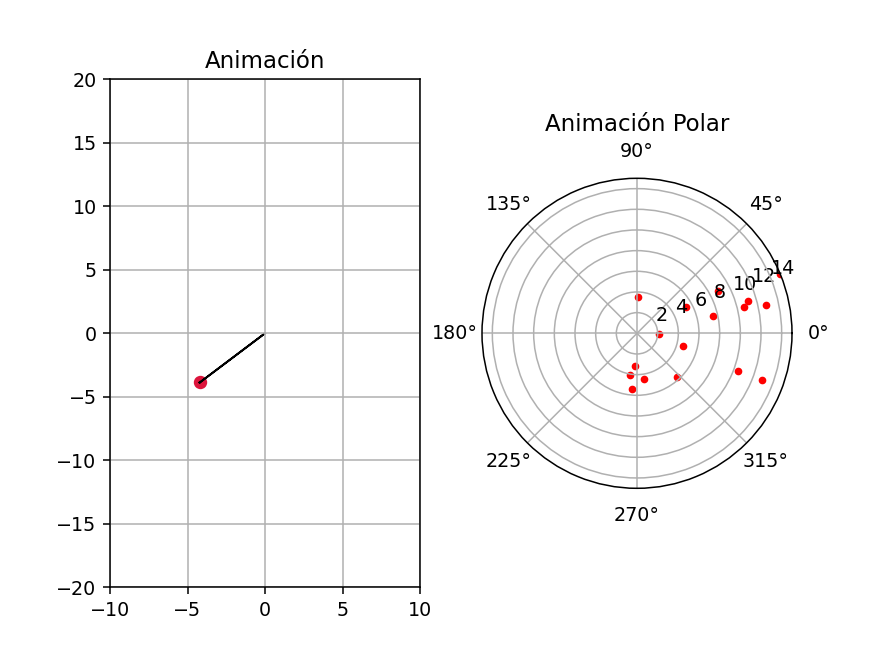

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2, projection='polar')

def init():

    
    ax.set_title("Animación")
    ax.set_xlim(-10,10)
    ax.set_ylim(-20,20)
    ax.grid()
    
    ax1.set_title("Animación Polar")
    ax1.set_rlim(0,15)
    
    
    
def animate(i):
    
    
    plot = ax.clear()

    init()
    
    plot = ax.arrow( 0.,0., x[i], y[i], head_width=0.05 )
    plot = ax.scatter(x[i], y[i], color = 'crimson', label = 'Particula')
    plot = ax1.scatter(theta[i],r[i],marker='.',color='r')
    

    
    return plot

frames = len(t)

Animation = anim.FuncAnimation(fig, animate, frames, init_func=init)